# Cell segmentation tutorial

This tutorial demonstrates how to perform automated cell segmentation on whole slide images (WSI) using LazySlide. We'll walk through the complete workflow from loading a sample lung carcinoma dataset to segmenting individual cells and classifying them into different cell types.

In [1]:
import lazyslide as zs

/usr/lib/python3.12/importlib/__init__.py:90: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  return _bootstrap._gcd_import(name[level:], package, level)


/home/runner/work/lazyslide-tutorials/lazyslide-tutorials/.venv/lib/python3.12/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


In [2]:
wsi = zs.datasets.lung_carcinoma(with_data=False)

lung_carcinoma.ndpi:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

WSI: /home/runner/.cache/huggingface/hub/datasets--RendeiroLab--LazySlide-data/snapshots/3ae589f240b9897db973b706f77636559b100696/lung_carcinoma.ndpi
Reader: openslide
Dimensions: 15616×16384 (h×w), 8 Pyramids
Pixel physical size: 0.22731405710129116 MPP
SpatialData object
└── Images
      └── 'wsi_thumbnail': DataArray[cyx] (3, 1817, 1906)
with coordinate systems:
    ▸ 'global', with elements:
        wsi_thumbnail (Images)
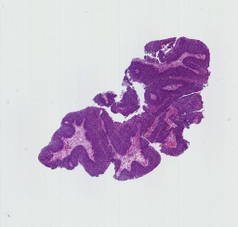

In [3]:
wsi

We'll use **InstanSeg** for cell segmentation, which works optimally with:
- **MPP (Microns Per Pixel): 0.5** - This resolution provides the right balance between detail and computational efficiency
- **Tile size: 512x512 pixels** - Optimal input size for the deep learning model
- **Overlap: 20%** - Ensures seamless segmentation across tile boundaries
- **Background fraction: 95%** - Filters out tiles that are mostly background/empty space

Many WSIs are too large to fit into the CPU/GPU memory to run inference, as usual, we need to tile it.

To improve the cell segmentation quality, it's highly recommanded to create overalpping tiles 

In [4]:
zs.pp.find_tissues(wsi)
zs.pp.tile_tissues(wsi, 512, overlap=0.2, background_fraction=0.95, mpp=0.5)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


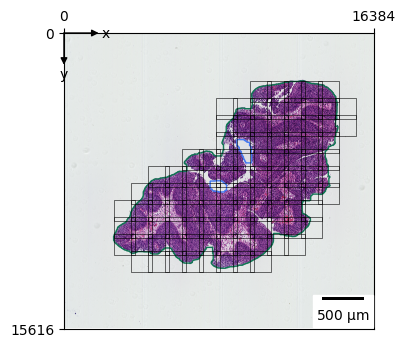

In [5]:
zs.pl.tiles(wsi, linewidth=0.4)

The visualization above shows the tiles that will be processed for cell segmentation. Each rectangle represents a 512x512 pixel tile at 0.5 MPP resolution. Notice how the tiles focus on tissue-rich areas while avoiding empty background regions.

## Cell Segmentation

Now we'll perform the actual cell segmentation using InstanSeg. This deep learning model will:
- **Detect individual cells** in each tissue tile
- **Generate precise cell boundaries** as polygon shapes
- **Handle overlapping cells** and complex tissue structures

The `batch_size=32` parameter controls how many tiles are processed simultaneously - adjust this based on your available GPU memory.

In [6]:
zs.seg.cells(wsi, batch_size=32)

instanseg/instanseg_v0_1_0.pt:   0%|          | 0.00/15.8M [00:00<?, ?B/s]

Output()

/home/runner/work/lazyslide-tutorials/lazyslide-tutorials/.venv/lib/python3.12/site-packages/torch/nn/modules/modul
e.py:1762: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse 
tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally
at /pytorch/aten/src/ATen/SparseCsrTensorImpl.cpp:53.)
  return forward_call(*args, **kwargs)

<Axes: >

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


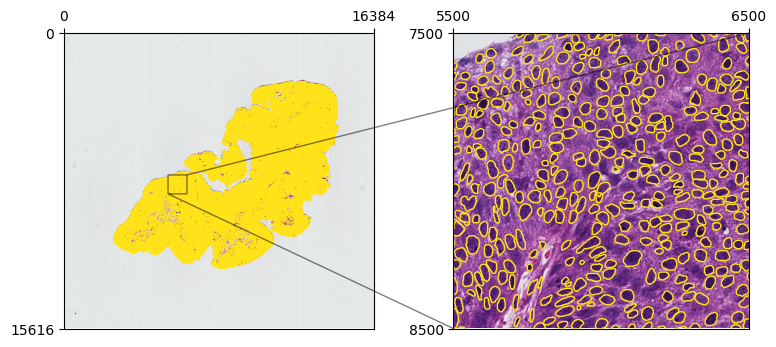

In [7]:
v = zs.pl.WSIViewer(wsi)
v.add_image()
v.add_polygons("cells", linewidth=1, fill=False)
v.add_zoom(5500, 6500, 7500, 8500)
v.show()

### Visualizing Segmented Cells

Let's create an interactive viewer to examine our segmentation results. The viewer will display:
- **Base tissue image** as the background layer
- **Cell boundaries** as polygon overlays (without fill for better visibility)
- **Zoomed region** to inspect segmentation quality in detail

In [8]:
zs.seg.cell_types(wsi, batch_size=32)

nulite/NuLite_H_jit.pt:   0%|          | 0.00/193M [00:00<?, ?B/s]

Output()

## Cell Type Classification

After segmenting individual cells, we can classify them into different cell types. This step uses a specialized model that analyzes:
- **Cell morphology** (shape, size, internal structure)
- **Tissue context** (surrounding cell types and patterns)
- **Staining characteristics** (intensity and distribution of H&E staining)

Common cell types in lung carcinoma include epithelial cells, stromal cells, immune cells, and various cancer cell subtypes.

In [9]:
v = zs.pl.WSIViewer(wsi)
v.add_image()
v.add_polygons("cell_types", color_by="class")

### Visualizing Cell Types

Now let's create a color-coded visualization where each cell type is displayed in a different color. This makes it easy to:
- **Identify spatial patterns** of different cell types
- **Analyze tissue organization** and cellular neighborhoods  
- **Spot regions of interest** for further analysis

<Axes: >

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


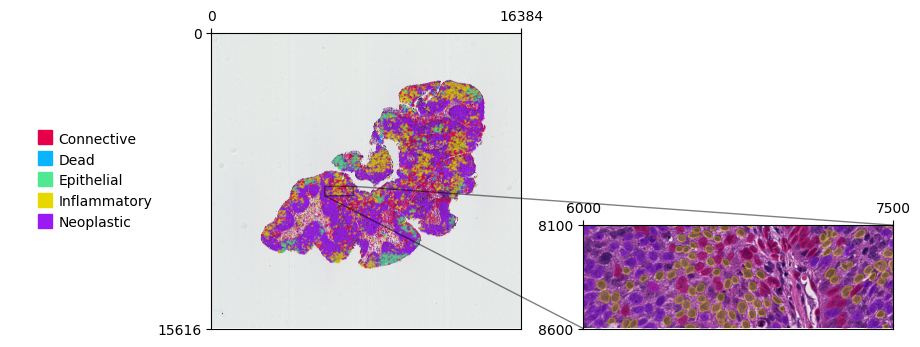

In [10]:
v.add_zoom(6000, 7500, 8100, 8600, cache=False)
v.show()

## Summary and Next Steps

🎉 **Congratulations!** You've successfully completed cell segmentation and classification on a whole slide image. 

### What we accomplished:
- ✅ Loaded and visualized a lung carcinoma WSI dataset
- ✅ Identified tissue regions and created optimal analysis tiles
- ✅ Segmented individual cells using InstanSeg deep learning model
- ✅ Classified cells into different morphological types
- ✅ Created interactive visualizations to explore results

### Possible next steps:
- **Quantitative analysis**: Extract cell counts, sizes, and spatial metrics
- **Biomarker analysis**: Combine with feature extraction for deeper insights  
- **Comparative studies**: Apply to multiple samples for population analysis
- **Custom models**: Train specialized models for your specific tissue types

The segmented cells and their classifications are now stored in your WSI object and ready for downstream analysis!